Imports

In [18]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



Load non-expert human evaluation file.

In [26]:
df = pd.read_csv('human_eval_testset.tsv', sep='\t', skiprows=0)

df.tail

<bound method NDFrame.tail of                                              statement prediction confidence  \
0    Since 1750, increases in CO2 (47%) and CH4 (15...        low  very high   
1    Over the next 2000 years, global mean sea leve...     medium        low   
2    By the end of the century, scenarios with very...     medium       high   
3    Over the past millennium, and especially since...     medium     medium   
4    The paleo context supports the assessment that...       high       high   
..                                                 ...        ...        ...   
295  REDD+ can significantly contribute to climate ...     medium       high   
296  Large-scale bioenergy projects with CCS may be...     medium     medium   
297  Reforestation and forest restoration can have ...       high     medium   
298  BEVs could create jobs associated with the EV ...     medium        low   
299  For pathways that limit warming to 2°C (>67%) ...        idk       high   

     corr

In [27]:
samples = df

samples['correct'] = samples.apply(
    lambda row: (row['confidence'] == row['prediction']), axis=1)

print(f"Accuracy: {samples['correct'].sum() / (samples.shape[0]-len(samples[samples['prediction'] == 'idk'])):.3f}")
print(f"'I don't know': {len(samples[samples['prediction'] == 'idk'])}")
print(f"N/A: {len(samples[samples['prediction'] == 'N/A'])}")

Accuracy: 0.366
'I don't know': 2
N/A: 0


In [35]:
# Filter samples
fs = samples.loc[(samples['prediction'] != 'nan') & (samples['prediction'] != 'idk')]

fs.tail

# # Compute a certainty score
# value_map = {'low': 0, 'medium': 1, 'high': 2, 'very high': 3}

# fs['score'] = fs.confidence.apply(
#     lambda x: value_map[x])

# fs['predicted_score'] = fs.prediction.apply(
#     lambda x: value_map[x])

# Break down scores
scores_all = {
    "low": fs.loc[fs['score'] == 0, 'predicted_score'].mean(),
    "medium": fs.loc[fs['score'] == 1, 'predicted_score'].mean(),
    "high": fs.loc[fs['score'] == 2, 'predicted_score'].mean(),
    "very high": fs.loc[fs['score'] == 3, 'predicted_score'].mean()
}

print(scores_all)

{'low': 1.46, 'medium': 1.505050505050505, 'high': 1.8888888888888888, 'very high': 1.88}


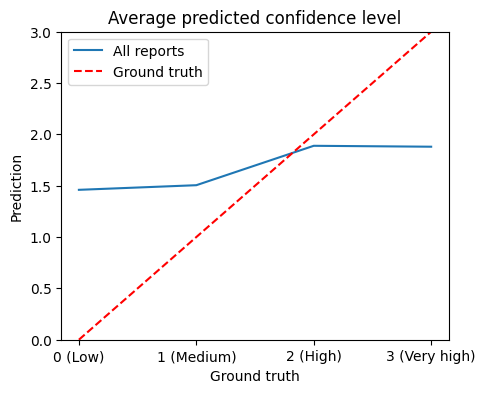

In [33]:
# Define the data




# Extract labels and values from the data dictionary

labels = list(scores_all.keys())
values_all = list(scores_all.values())
# values_wg1 = list(scores_wg1.values())
# values_wg23 = list(scores_wg23.values())

# Define the custom labels for the x-axis
x_labels = ['0 (Low)', '1 (Medium)', '2 (High)', '3 (Very high)']

plt.figure(figsize=(5, 4))

# Create the line plot with labeled curve
sns.lineplot(x=labels, y=values_all, label='All reports')
# sns.lineplot(x=labels, y=values_wg1, linestyle='--', color="steelblue", label='WG1 report')
# sns.lineplot(x=labels, y=values_wg23, linestyle='dotted', color="steelblue", label='WG2 & WG3 report')


# Add the ground truth line (y = x)
x = np.arange(len(labels))
plt.plot(x, x, linestyle='--', color='red', label='Ground truth')

# Customize the x-axis tick labels
plt.xticks(labels, x_labels)

# Set the y-axis limits
plt.ylim(0, 3)

# Set the title and labels
plt.title("Average predicted confidence level")
plt.xlabel("Ground truth")
plt.ylabel("Prediction")


# Show the legend
plt.legend()

# Show the plot
plt.savefig("human-non-expert.png", dpi=500)
plt.show()